<a href="https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know?scriptVersionId=119723357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">🔥 One Hot Encoding - everything you need to know 🔥</div>

In [1]:
from IPython.display import Image
# https://www.pexels.com/pl-pl/zdjecie/fotografia-sztucznych-ogni-60726/

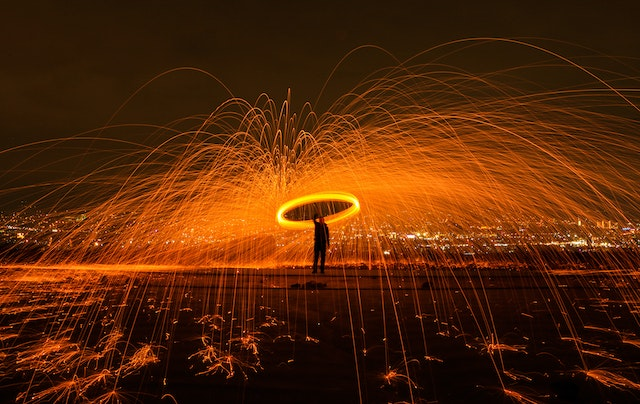

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents</div>

<a id="toc"></a>
- [1. Introduction](#1)
    - [1.1 One Hot Encoder vs get_dummies](#1.1)
    - [1.2 The dummy variable trap: drop or not to drop?](#1.2)
    - [1.3 Possible drawbacks of dropping a column during one hot encoding](#1.3)
    - [1.4 Decision tree-based models vs one hot encoding](#1.4)
    - [1.5 One Hot Encoding vs very high number of categorical features](#1.5)
        - [1.5.1 Grouping levels together](#1.5.1)
        - [1.5.2 Creating "Other" column](#1.5.2)
    - [1.6 Pipelines and One Hot Encoding](#1.6)
    - [1.7 One Hot Encoding - before or after train-test split?](#1.7)
    - [1.8 Best practices](#1.8)
    - [1.9 Simple examples](#1.9)
        - [1.9.1 Using get_dummies](#1.9.1)
        - [1.9.2 Using OneHotEncoder](#1.9.2)
- [2. Set-up](#2)
    - [2.1 Import Libraries](#2.1)
    - [2.2 Import Data](#2.2)
    - [2.3 Data Set Characteristics](#2.3)
    - [2.4 Dataset Attributes](#2.4)
- [3. Data preprocessing](#3)
    - [3.1 Dealin with missing values in TotalCharges](#3.1)
    - [3.2 Dealing with duplicate values](#3.2)
    - [3.3 Creating numerical and categorical lists](#3.3)
- [4. Feature Engineering](#4)
    - [4.1 Train test split - stratified splitting](#4.1)
    - [4.2 Feature scaling](#4.2)
    - [4.3 One hot Encoding](#4.3)
        - [4.3.1 X_train encoding](#4.3.1)
        - [4.3.2 X_test encoding](#4.3.2)
        - [4.3.3 Renaming features](#4.3.3)
    - [4.4 Feature importance](#4.4)
- [5. My other notebooks](#5)
- [6. References](#6)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Introduction</div>

In order to fit ML algorithms you have to convert categorical (non-numeric) variables to numeric features before building your model. This process is known as categorical data encoding. There are different encoding techniques available, but the most common and widely used is One Hot Encoding.

There are two popular and commonly used methods:  scikit-learn OneHotEncoder(OHE) and Pandas get_dummies method.

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>In essence:</b> one-hot encoding creates a new column for each unique category in a categorical variable and assigns a binary value of 1 or 0 to indicate the presence or absence of that category in a given observation.</div>

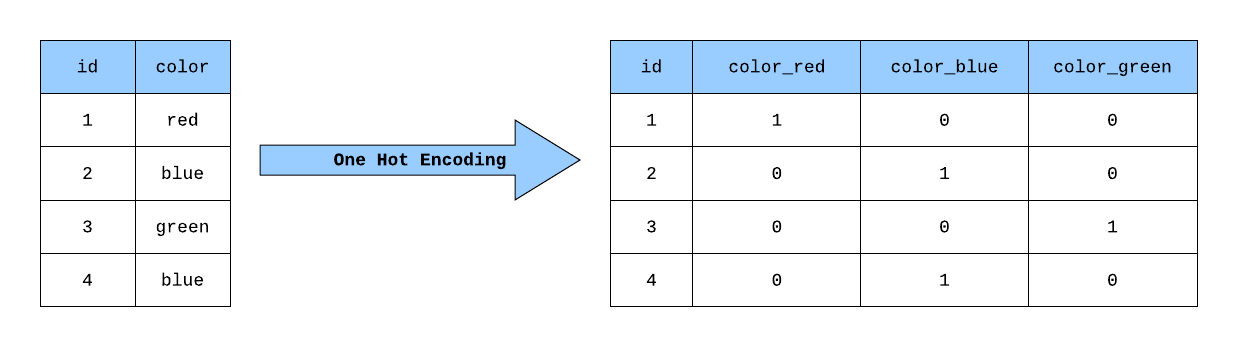

<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>One Hot Encoder vs get_dummies</span></b>

get_dummies is a bit more convenient and probably that's why it's a popular method.

The real problem is: handling unknown categorical features which will pop up in production. If the total number of unique values in a categorical column is not the same for our train set vs test set, we are going to have problems. OneHotEncoder is a transformer class, so it can be fitted to data. Once fitted, it is able to transform validation data based on the categories it learned.

Basically, get_dummies can be used in exploratory analysis, whereas OneHotEncoder in computation and estimation.

> Basically **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">get_dummies</mark>** can be used in exploratory analysis, whereas **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">  OneHotEncoder</mark>** in computation and estimation.

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>OHE creates a function which saves the exploded categories. </b> It is extremely useful if we want to process the new data and use the same categorical variables, with consistent results. If previously unseen data contains new categories, the encoder will ignore them or raise an error (depending on setting handle_unknown parameter). The key point here is that we can handle the situation with ease.
</div>

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>The dummy variable trap: drop or not to drop?</span></b>

When dealing with categorical features, a common convention is to drop one of the new columns from each feature. The argument comes from statistics: without dropping a column, we know that the sum of all these columns will be 1 in every row. For example, encoding gender as two variables, is_male and is_female, produces two features which are perfectly negatively correlated. This is called the dummy variable trap: perfect multicollinearity between the predictors.

If we decide to drop the first column, the algorithm drops the category value name that comes first alpha-numerically in the set. In the gender example, the first column would be Female since F comes before M.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
The idea of dropping the first column is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into an unregularized linear model. However, a principle of machine learning is to build a highly predictive model. Therefore, we seldom take advantage of very simple models and we usually apply regularization.
</ul>
</div>

<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Possible drawbacks of dropping a column during one hot encoding</span></b>

1. In the documentation we can read that: “dropping one category breaks the symmetry of the original representation and can therefore induce a bias in downstream models, for instance for penalized linear classification or regression models.”

2. There is one more problem. Take a closer look at the OneHotEncoder’s parameter ‘first’. By checking the documentation we can read that it: “drops the first category in each feature. If only one category is present, the feature will be dropped entirely.” So it can happen that a whole column is dropped, but only if it has only one category. 

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
We can think that in this case the feature is not useful anyway, but consider of a situation where we have to deal with new entries that are present in the test set (and production), but not in the training set. For example we could have only entries regarding females in the training set. If we don't drop a column, the natural thing to do is put all zeros there (i.e. male is not in any of the genders we have seen). If we dropped a column (such as "male") then there is no longer a way to encode the new variable. A reasonable compromise could be to include another column called "other", and drop that if we want to avoid the dummy trap.
</ul>
</div>

<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>Decision tree-based models vs one hot encoding</span></b>

Decision trees and their derivatives (including regression trees and ensemble algorithms like random forests) handle categorical variables better than any algorithm family out there (neural networks, SVMs, distance-based) except Bayesian approaches. They are also robust to categorical variables that are not highly preprocessed. To understand how it works, you can build intuition through the view that it's almost like decision trees treat all features like categorical variables and handle continuous values in a free way, looking only at the ordering.

Theoretically we don’t even need to convert categorical features to integers, but scikit-learn doesn’t support using categorical variables as is, and hence it is mandatory to convert them into integers.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Tree-based models typically don't perform well with one-hot encodings with lots of levels. This is because they work based on increasing the homogeneity of the next level. If we have a lot of levels, only a small fraction of the data (typically) will belong to any given level, so the one-hot encoded columns will be mostly zeros. Since splitting on this column will only produce a small gain, tree-based algorithms typically ignore the information in favor of other columns.
</ul>
</div>

<a id="1.5"></a>
## <b>1.5 <span style='color:#E1B12D'>One Hot Encoding vs very high number of categorical features</span></b>

One-Hot encoding should not be performed if the number of categories is very high. This would result in sparse data. Depending on the use case, we will need to do some exploratory data analysis to do some feature engineering.

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>What is a level.</b> Each of the four different colors (Red, Blue, Green, and Yellow) are referred to be levels of the Color feature. One-hot encoding would turn the feature Color into 4 different columns (one for each level). So the number of levels (distinct values that a category can take) in the Color feature is 4.
</div>

Therefore:
<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li>The number of rows should be at least 5 times the number of features.    
<li>For tree-based models, try to keep the number of levels less than 5 for the feature.</ul>
</div>

If the number of levels is large, you could be better off with a different encoding scheme. Feature engineering is the most important aspect of building an effective model.


<a id="1.5.1"></a>
### <b>1.5.1 <span style='color:#E1B12D'>Grouping levels together</span></b>

* Instead of dealing with types of trees, you can introduce classes: coniferous, deciduous.
* Instead of dealing with streets, you can introduce districts: Manhattan, Brooklyn, Queens, Bronx and Staten Island.

<a id="1.5.2"></a>
### <b>1.5.2 <span style='color:#E1B12D'>Creating "Other" column</span></b>

For example: you run an e-commerce business in the European Union and you have customers in all member state countries, but 60% from Germany, 25% for France, 10% from Poland and the remaining 5% across the other 24 countries. 

An encoding such as: MState_GE, MState_FR, MState_PL, MState_OTHER makes sense in this context.

<a id="1.6"></a>
## <b>1.6 <span style='color:#E1B12D'>Pipelines and One Hot Encoding</span></b>

Pandas get_dummies is not compatible with the Scikit-learn pipeline. OneHotEncoder matches scikit-learn’s transformer API and therefore it is compatible with pipeline and is easy to use for our convenience.

<a id="1.7"></a>
## <b>1.7 <span style='color:#E1B12D'>One Hot Encoding - before or after train-test split?</span></b>

We will encounter errors when fitting a model on the training set and predict on test features of different shapes.
That's why a lot of people advise to perform one hot encoding before the train-test split.

Generally you should to treat the test set as though you did not have it during training. Performing the encoding before the split will lead to data leakage (train-test contamination). For example - the test set could contain one or more categories that were not present in a training set. It happens in real life applications all the time.

However, if the goal is exploratory data analysis, one-hot encoding can be performed before splitting the data into training and testing sets.

<a id="1.8"></a>
## <b>1.8 <span style='color:#E1B12D'>Best practices</span></b>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li>Scikit-learn's OneHotEncoder is a much better choice for machine learning than Pandas get_dummies. You can still take advantage of Pandas get_dummies for data preparation and exploratory data analysis.
<li>You should perform One Hot Encoding before train-test split to avoid data leakage (train-test contamination).
<li> One hot encoding doesn't scale well when the number of output labels is large. For example, in language modeling the number of output labels is extremely large. This means that after one hot encoding we will get the huge number of fetures.
<li> Tree-based models struggle if there are a large number of levels, regardless of how much data we have.
<li> Linear models can deal with a large number of levels, provided we have enough data to accurately estimate the coefficients.
<li> Take advantage of feature engineering to reduce the number of outputs to improve the effectiveness of your model if you are one-hot encoding the feature.
<li> The idea of dropping the first column is useful in situations where perfectly collinear features cause problems, such as when feeding the resulting data into an unregularized linear model. 
<li> After one hot encoding every vector is in equal distance from every other vector. In some scenarios the distributed representation can capture more important information (e.g. for NLP tasks).
</ul>
</div>

<a id="1.9"></a>
## <b>1.9 <span style='color:#E1B12D'>Simple examples</span></b>

In [3]:
import pandas as pd
data=pd.DataFrame(pd.Series(['red','green','blue']))
# new_data has two values that data does not have. 
new_data= pd.DataFrame(pd.Series(['red','green','blue','yellow','purple']))

<a id="1.9.1"></a>
### <b>1.9.1 <span style='color:#E1B12D'>Using get_dummies</span></b>

In [4]:
gd_df = pd.get_dummies(data)
print(gd_df)

   0_blue  0_green  0_red
0       0        0      1
1       0        1      0
2       1        0      0


get_dummies returns a DataFrame.

In [5]:
col_list = gd_df.columns.tolist()
new_df = pd.get_dummies(new_data)
# handle unknow by using .reindex and .fillna()
new_df = new_df.reindex(columns=col_list).fillna(0)
print(new_df)

   0_blue  0_green  0_red
0       0        0      1
1       0        1      0
2       1        0      0
3       0        0      0
4       0        0      0


<a id="1.9.2"></a>
### <b>1.9.2 <span style='color:#E1B12D'>Using OneHotEncoder</span></b>

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(data)
ohe.transform(new_data)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

OneHotEncoder returns an array-like object of encoded data, which can be later transformed into a dense matrix or dataframe.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Set-up</div>

<a id="2.1"></a>
## <b>2.1 <span style='color:#E1B12D'>Import Libraries</span></b>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

<a id="2.2"></a>
## <b>2.2 <span style='color:#E1B12D'>Import Data</span></b> 

In [8]:
try:
    raw_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
except:
    raw_df = pd.read_csv('telco.csv')

<a id="2.3"></a>
## <b>2.3 <span style='color:#E1B12D'>Data Set Characteristics</span></b>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn.
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
* Demographic info about customers – gender, age range, and if they have partners and dependents.

The are no missing values in data set.

<a id="2.4"></a>
## <b>2.4 <span style='color:#E1B12D'>Dataset Attributes</span></b> 


* <code>customerID</code> - Customer ID

* <code>gender</code> - Whether the customer is a male or a female

* <code>SeniorCitizen</code> - Whether the customer is a senior citizen (1, 0)

* <code>Partner</code> - Whether the customer has a partner (Yes, No)

* <code>Dependents</code> - Whether the customer has dependents (Yes, No)

* <code>tenure</code> - Number of months the customer has stayed with the company

* <code>PhoneService</code> - Whether the customer has a phone service (Yes, No)

* <code>MultipleLines</code> - Whether the customer has multiple lines (Yes, No, No phone service)

* <code>InternetService</code> - Customer’s internet service provider (DSL, Fiber optic, No)

* <code>OnlineSecurity</code> - Whether the customer has online security (Yes, No, No internet service)

* <code>OnlineBackup</code> - Whether the customer has online backup or not (Yes, No, No internet service)

* <code>DeviceProtection</code> - Whether the customer has device protection (Yes, No, No internet service)

* <code>TechSupport</code> - Whether the customer has tech support (Yes, No, No internet service)

* <code>StreamingTV</code> - Whether the customer has streaming TV service (Yes, No, No internet service)

* <code>StreamingMovies</code> - Whether the customer has streaming movies service (Yes, No, No internet service)

* <code>Contract</code> - Indicates the type of the contract (Month-to-month, One year, Two year)

* <code>PaperlessBilling</code> - Whether the customer has paperless billing (Yes, No)

* <code>PaymentMethod</code> - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* <code>MonthlyCharges</code> - Indicates the current monthly subscription cost of the customer

* <code>TotalCharges</code> - Indicates the total charges paid by the customer so far

* <code>Churn</code> - Indicates whether the customer churned

In [9]:
palette = ['#008080','#FF6347', '#E50000', '#D2691E'] # Creating color palette for plots

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Data preprocessing</div>

We don't need a customerID column, so I'll delete it.

In [10]:
df = raw_df.drop('customerID', axis=1)

<a id="3.1"></a>
## <b>3.1 <span style='color:#E1B12D'>Dealin with missing values in TotalCharges</span></b> 

In [11]:
 # df['TotalCharges'] = df['TotalCharges'].astype(float)

An error occured when trying to execule a code above: could not convert string to float: ''

The string to be converted must not contain any characters or symbols. The error occurs due to the incorrect initialization of value to a string variable.

We have probably empty strings in 'TotalCharges' colums, but as they were defined as string, they didn't appear as Null Values.

In [12]:
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


We coud try to impute the missing values by building a model for that reason or fill them using some often used values in that kind of situations e.g. mean, median or mode, but it's simpler (and probably better) to just drop the coresponding rows from a dataset as the numbers of empty string is very low (11).

In [13]:
df = df.drop(step2, axis = 0).reset_index(drop=True) # Dropping rows with no values in 'Total_charges'

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # Finally we can convert string to float in 'Total_charges' column

<a id="3.2"></a>
## <b>3.2 <span style='color:#E1B12D'>Dealing with duplicated values</span></b> 

In [15]:
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [16]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


<a id="3.3"></a>
## <b>3.3 <span style='color:#E1B12D'>Creating numerical and categorical lists</span></b> 

In [17]:
# distinction is based on the number of different values in the column
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding target:'Churn'

In [18]:
print('Numerical fetures: ',numeric_columns)
print('Categorical fetures: ',categoric_columns)

Numerical fetures:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical fetures:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Feature Engineering</div>

<a id="4.1"></a>
## <b>4.1 <span style='color:#E1B12D'>Train test split - stratified splitting</span></b>

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about dealing with imbalanced datasets</mark>**: [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)

<a id="4.2"></a>
## <b>4.2 <span style='color:#E1B12D'>Feature scaling</span></b>

In [21]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [22]:
col_names = numeric_columns
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

<a id="4.3"></a>
## <b>4.3 <span style='color:#E1B12D'>One hot Encoding</span></b>

In [23]:
print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Encoding multiple columns. Unfortunately you cannot pass a list here so you need to copy-paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

<a id="4.3.1"></a>
### <b>4.3.1 <span style='color:#E1B12D'>X_train encoding</span></b>

In [25]:
# Transforming
transformed = transformer.fit_transform(X_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_train.index
# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)
# Dropping old categorical columns
X_train.drop(categoric_columns, axis=1, inplace=True)
# CHecking result
X_train.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
1956,0.399060,-0.165939,0.058733,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,-0.748542,0.379070,-0.516318,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,0.481032,-0.361540,0.044996,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,-0.010798,0.322229,-0.002408,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,0.358074,-1.486666,-0.640848,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


<a id="4.3.2"></a>
### <b>4.3.2 <span style='color:#E1B12D'>X_test encoding</span></b>

In [26]:
# Transforming
transformed = transformer.fit_transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_test.index
# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)
# Dropping old categorical columns
X_test.drop(categoric_columns, axis=1, inplace=True)
# CHecking result
X_test.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
5770,0.229657,1.026915,0.617047,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1129,-1.258728,-1.473707,-0.993085,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2290,-1.298955,-1.280343,-1.003334,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
658,0.149203,-1.437656,-0.706226,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3623,-0.655329,-1.280343,-0.832160,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


<a id="4.3.3"></a>
### <b>4.3.3 <span style='color:#E1B12D'>Renaming features</span></b>

After One Hot Encoding you probably would like to rename feature names.

In [27]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [28]:
# Setting new feature names

X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']
# After renaming the columns

X_train.head()

,Tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
1956,0.399060,-0.165939,0.058733,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,-0.748542,0.379070,-0.516318,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,0.481032,-0.361540,0.044996,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,-0.010798,0.322229,-0.002408,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,0.358074,-1.486666,-0.640848,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


<a id="4.4"></a>
## <b>4.4 <span style='color:#E1B12D'>Feature importance</span></b>

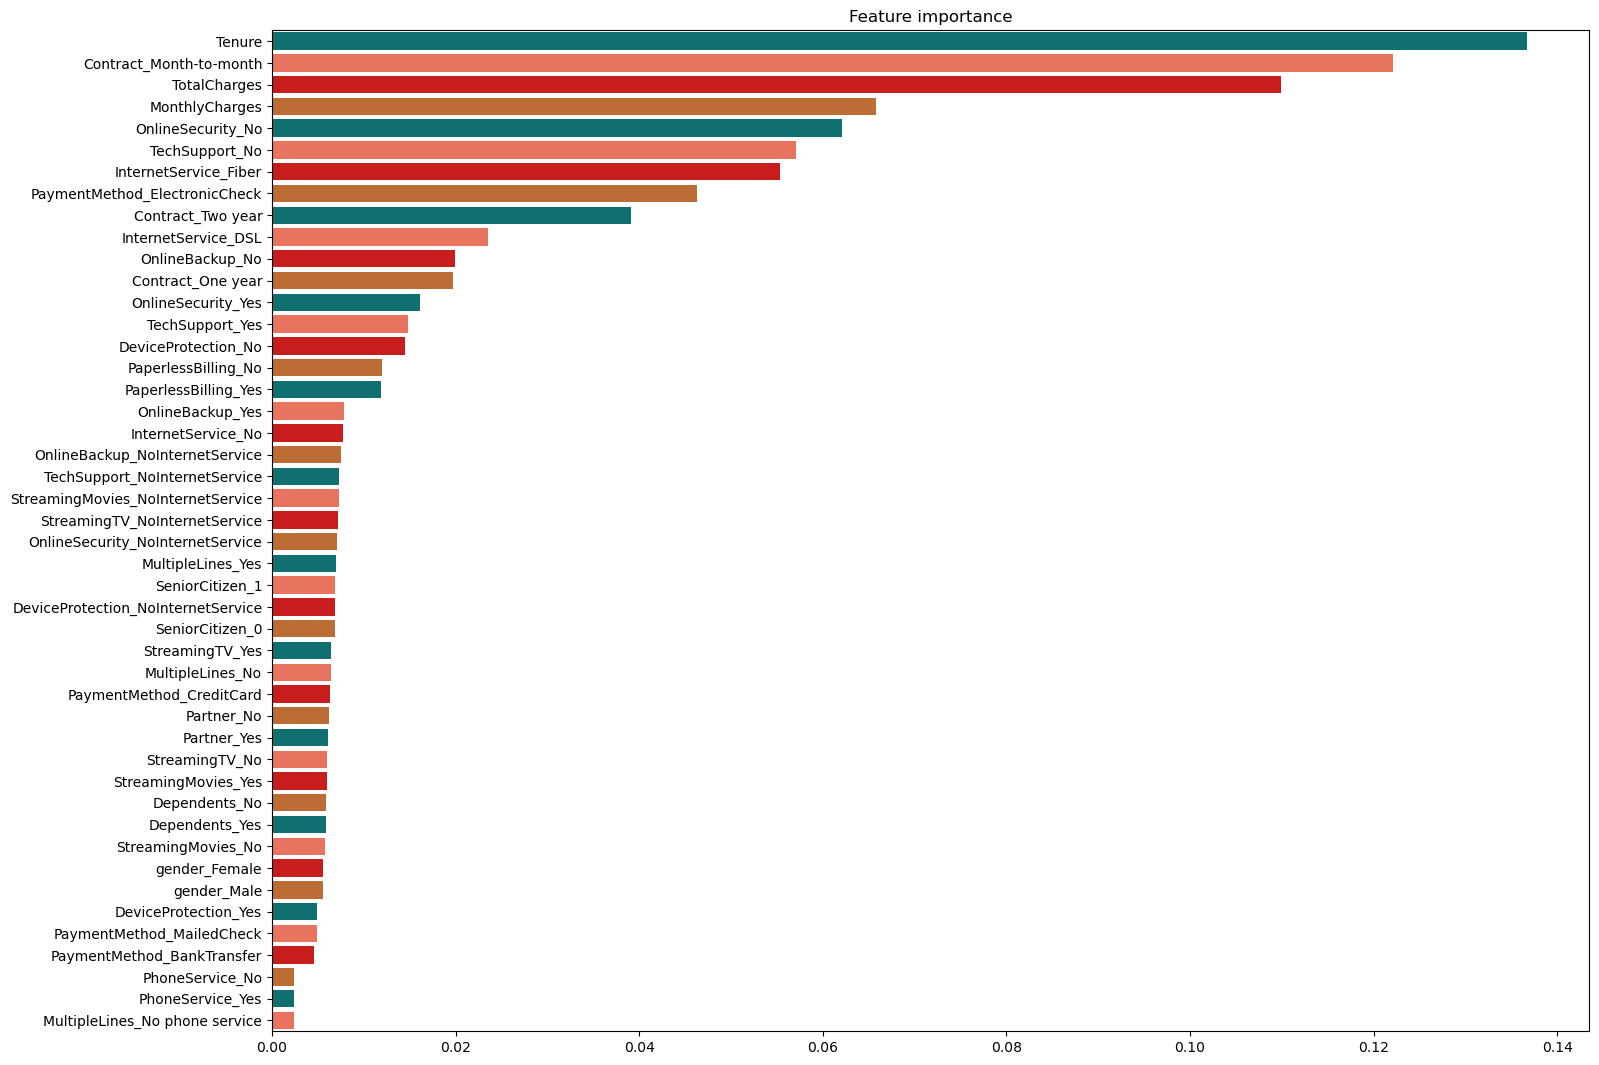

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf = clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> My other notebooks</div>

Here is a list of the notebooks I have completed so far:

* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="6"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span> References</div>

https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc

https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/

https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki

https://medium.com/mlearning-ai/get-column-name-after-fitting-the-machine-learning-pipeline-145a2a8051cc

https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707

https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html